In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/boston-data-set/boston.csv


In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
#Loading the data,dropping Unnamed column and shuffling the data
df = pd.read_csv('/kaggle/input/boston-data-set/boston.csv')
df = df.drop('Unnamed: 0',axis = 1)
df0 = df.sample(frac = 1,random_state = 3)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#Checking Shape
df.shape

(506, 14)

In [5]:
#To check the data-type of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
#To check the descriptive stats of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#To check all the columns of dataset
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

# Exploratory Data Analysis

## Missing Values

In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

No missing values

# Visualization

## Univariate Analysis

### 1. Observing the Target Variable

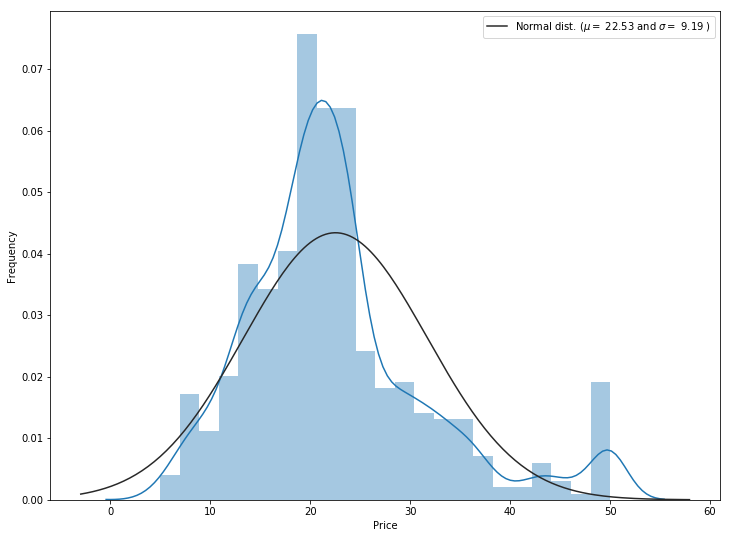

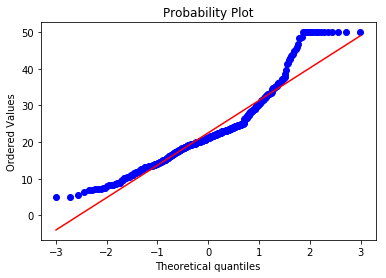

In [9]:
plt.subplots(figsize=(12,9))
sns.distplot(df['Price'], fit=st.norm)

# Get the fitted parameters used by the function

(mu, sigma) = st.norm.fit(df['Price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
st.probplot(df['Price'], plot=plt)
plt.show()

#### This target varibale is right skewed. Now, we need to tranform this variable and make it as normal distribution.

### 2.So we are using log for target variable to make the distribution more normal.

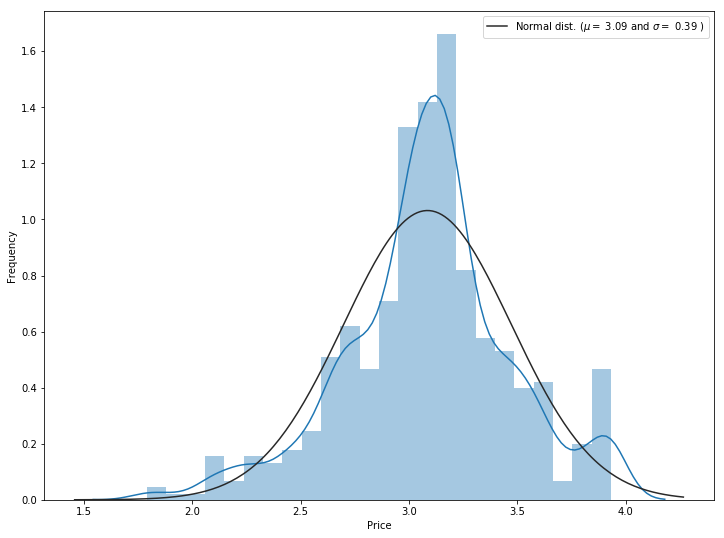

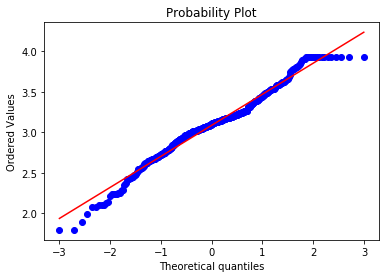

In [10]:
#we use log function which is in numpy
df['Price'] = np.log1p(df['Price'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(df['Price'], fit=st.norm)

# Get the fitted parameters used by the function

(mu, sigma) = st.norm.fit(df['Price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
st.probplot(df['Price'], plot=plt)
plt.show()


## Correlation in Data

In [11]:
corr = df.corr()['Price']
corr[np.argsort(corr, axis=0)[::-1]]

Price      1.000000
RM         0.637387
B          0.400773
ZN         0.365136
DIS        0.339744
CHAS       0.159435
AGE       -0.452150
RAD       -0.478488
PTRATIO   -0.504052
NOX       -0.508900
CRIM      -0.520692
INDUS     -0.541258
TAX       -0.558832
LSTAT     -0.804294
Name: Price, dtype: float64

#### RM has more than 0.5 correlation with Price.
#### LSTAT has highly negative correlation with Price

#### This can prove to be important features to predict SalePrice.

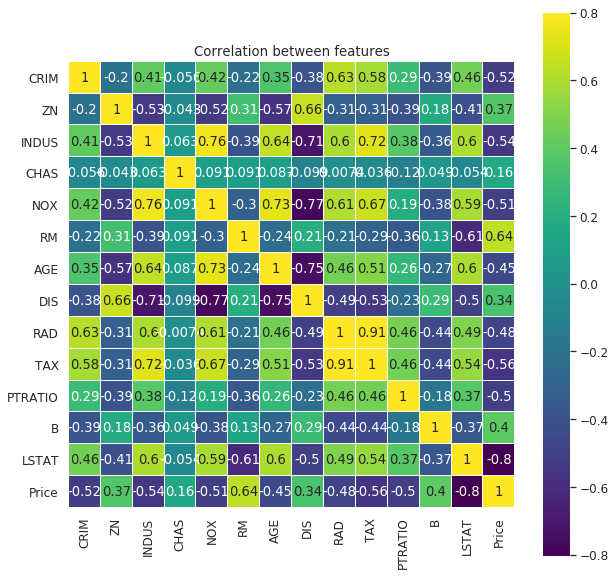

In [12]:
corrMatrix=df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','Price']].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

## Bivariate Analysis

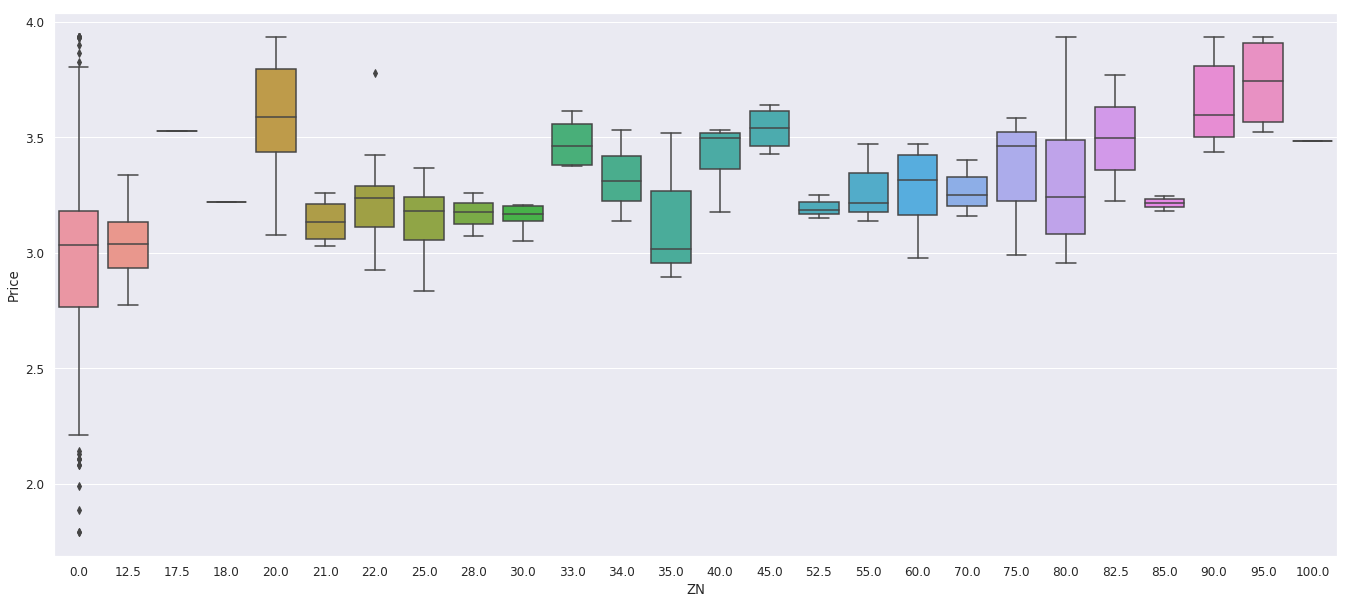

In [13]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="ZN", y="Price", data=df)

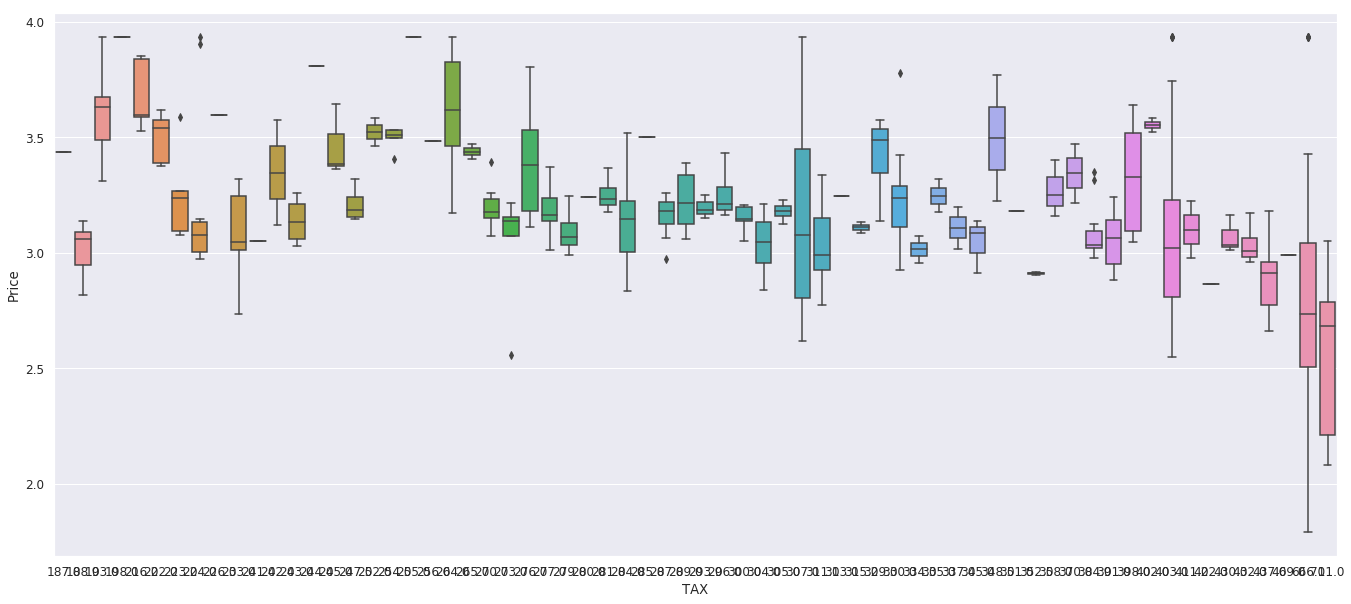

In [14]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="TAX", y="Price", data=df)

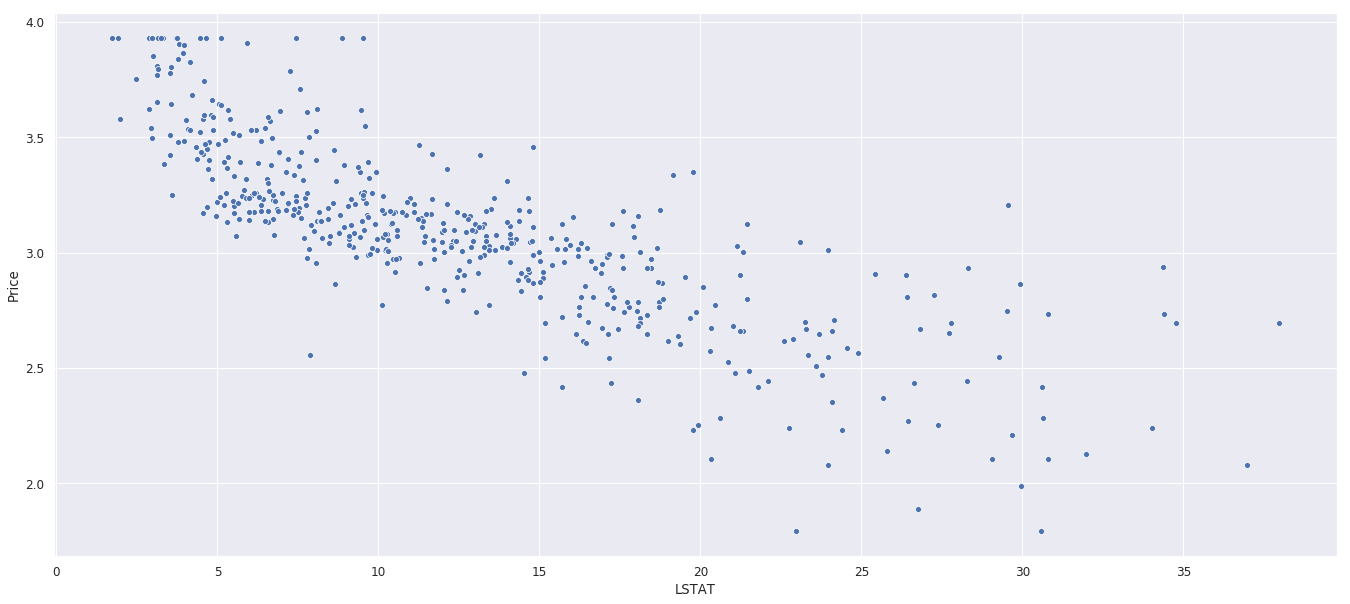

In [15]:
sns.scatterplot(df['LSTAT'],df['Price'])

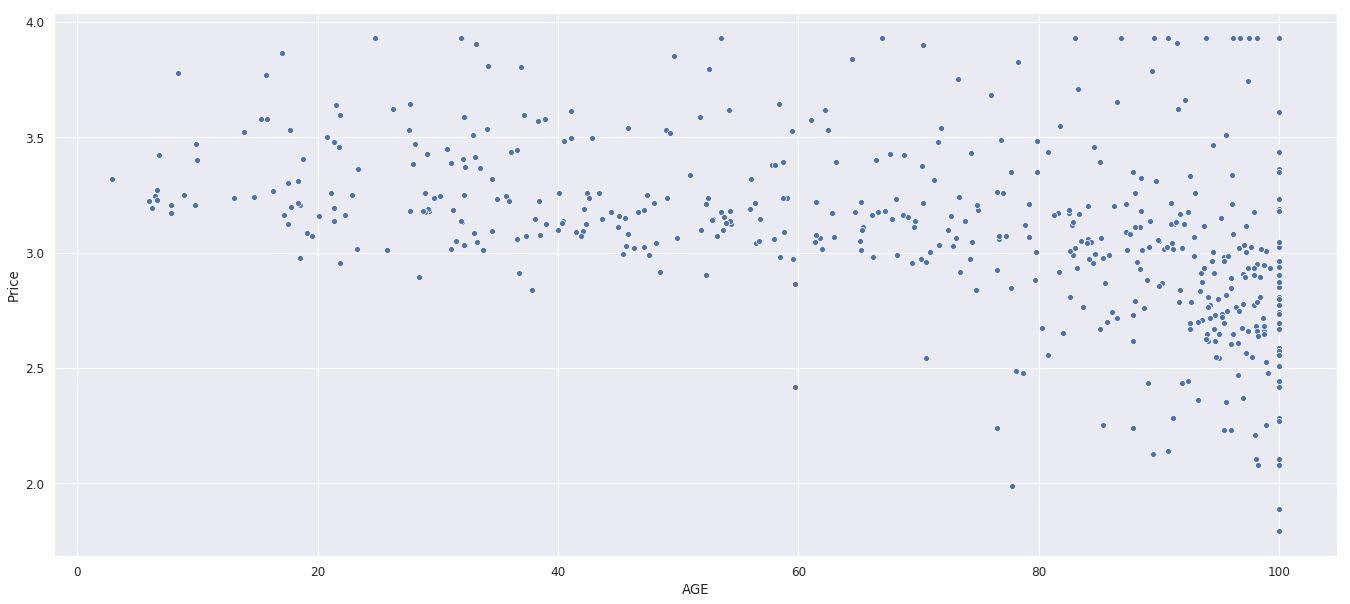

In [16]:
sns.scatterplot(df['AGE'],df['Price'])

# Building Statistical Model

In [17]:
#importing statsmodel library
import statsmodels.api as sm

In [18]:
#Taking X and y and adding constant
y = df['Price']
X = df.drop('Price',axis = 1)
Xc = sm.add_constant(X)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
#Importing VIF and applying its function
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.DataFrame([vif(Xc.values,i)for i in range(Xc.shape[1])],index = Xc.columns,columns=['VIF'])

,VIF
const,585.265238
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496


In [20]:
#Building OLS model
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          2.19e-157
Time:                        08:53:15   Log-Likelihood:                 157.98
No. Observations:                 506   AIC:                            -288.0
Df Residuals:                     492   BIC:                            -228.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0801      0.193     21.125      0.000       3.701       4.460
CRIM          -0.0093      0.001     -7.512      0.000      -0.012      -0.007
ZN             0.0012      0.001      2.224      0.027       0.000       0.002
INDUS          0.0022      0.002      0.957      0.339      -0.002       0.007
CHAS           0.0966      0.033      2.963      0.003       0.033       0.161
NOX           -0.7422      0.145     -5.134      0.000      -1.026      -0.458
RM             0.0902      0.016      5.701      0.000       0.059       0.121
AGE            0.0002      0.000      0.333      0.739      -0.001       0.001
DIS           -0.0476      0.008     -6.302      0.000      -0.062      -0.033
RAD            0.0135      0.003      5.372      0.000       0.009       0.018
TAX           -0.0006      0.000     -4.147      0.000      -0.001      -0.000
PTRATIO       -0.0366      0.005     -7.399      0.000      -0.046      -0.027
B              0.0004      0.000      3.909      0.000       0.000       0.001
LSTAT         -0.0273      0.002    -14.200      0.000      -0.031      -0.023
==============================================================================
Omnibus:                       65.404   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.896
Skew:                           0.553   Prob(JB):                     3.26e-50
Kurtosis:                       6.096   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that INDUS & AGE are highly significant..so we have to drop it.

In [21]:
#Drop INDUS,AGE
Xc = Xc.drop(['INDUS','AGE'],axis = 1)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     168.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          2.16e-159
Time:                        08:53:15   Log-Likelihood:                 157.45
No. Observations:                 506   AIC:                            -290.9
Df Residuals:                     494   BIC:                            -240.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0643      0.192     21.173      0.000       3.687       4.441
CRIM          -0.0094      0.001     -7.559      0.000      -0.012      -0.007
ZN             0.0011      0.001      2.112      0.035    7.53e-05       0.002
CHAS           0.1004      0.032      3.102      0.002       0.037       0.164
NOX           -0.6928      0.134     -5.174      0.000      -0.956      -0.430
RM             0.0899      0.015      5.839      0.000       0.060       0.120
DIS           -0.0498      0.007     -7.083      0.000      -0.064      -0.036
RAD            0.0128      0.002      5.311      0.000       0.008       0.017
TAX           -0.0005      0.000     -4.142      0.000      -0.001      -0.000
PTRATIO       -0.0359      0.005     -7.341      0.000      -0.045      -0.026
B              0.0004      0.000      3.912      0.000       0.000       0.001
LSTAT         -0.0269      0.002    -14.972      0.000      -0.030      -0.023
==============================================================================
Omnibus:                       64.996   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.707
Skew:                           0.547   Prob(JB):                     3.58e-50
Kurtosis:                       6.099   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test of Assumptions

## 1.Test of Normality of Residuals

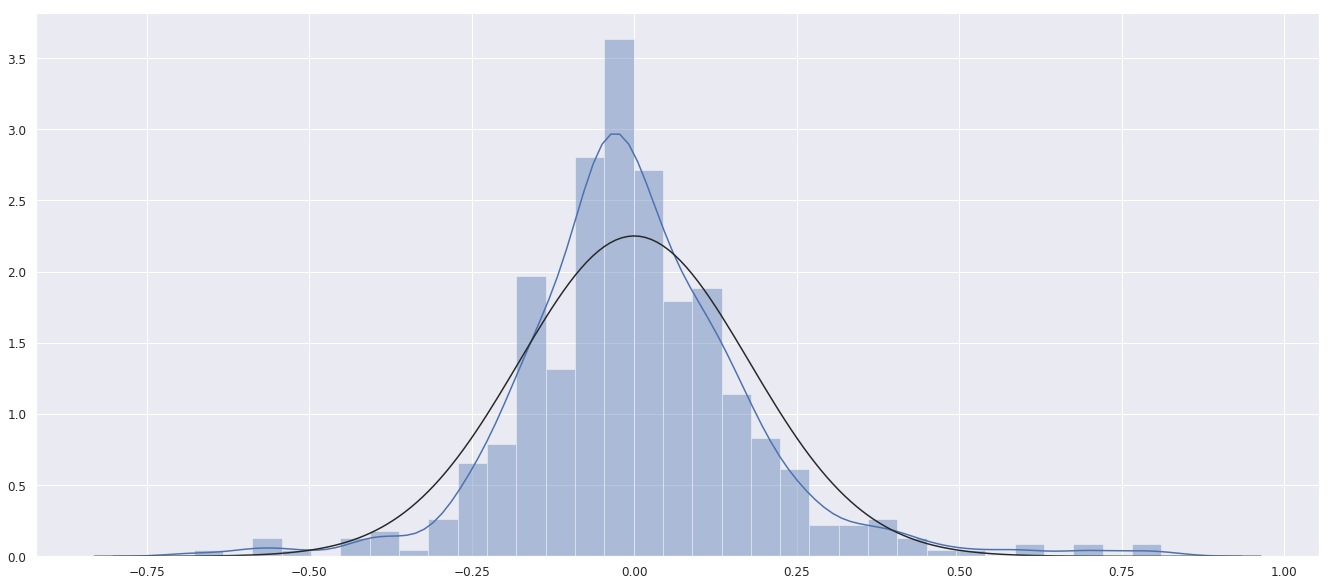

In [22]:
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid,fit = norm)

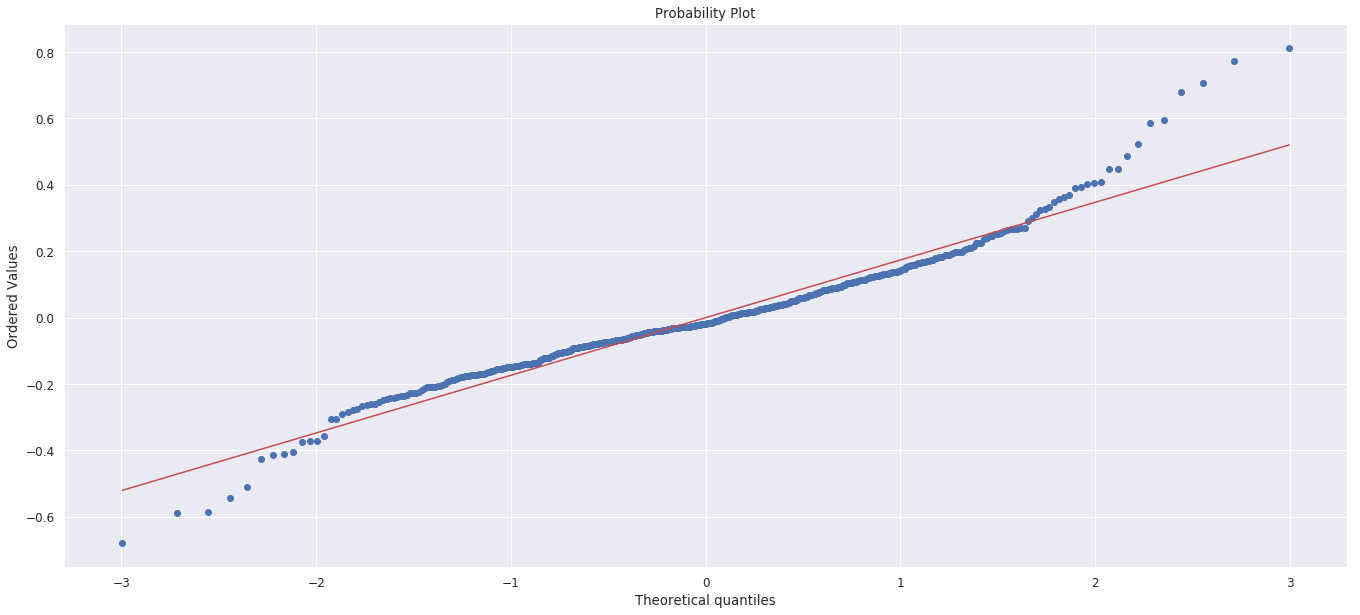

In [23]:
import scipy.stats as st
st.probplot(model.resid,plot = plt)
plt.show()

Ho: Data is normal

H1: Data is not normal

In [24]:
#Jarque Bera Test to check normality
st.jarque_bera(model.resid)

(227.70736222094297, 0.0)

pvalue is equal to zero so reject Ho ,so JB test indicate that residual are not normal.

In [25]:
#Applying Transformation
ly = np.log(y)

In [26]:
model = sm.OLS(ly,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     163.0
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          1.70e-156
Time:                        08:53:16   Log-Likelihood:                 699.29
No. Observations:                 506   AIC:                            -1375.
Df Residuals:                     494   BIC:                            -1324.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4800      0.066     22.498      0.000       1.351       1.609
CRIM          -0.0039      0.000     -9.131      0.000      -0.005      -0.003
ZN             0.0003      0.000      1.449      0.148   -9.06e-05       0.001
CHAS           0.0320      0.011      2.886      0.004       0.010       0.054
NOX           -0.2157      0.046     -4.701      0.000      -0.306      -0.126
RM             0.0218      0.005      4.125      0.000       0.011       0.032
DIS           -0.0149      0.002     -6.193      0.000      -0.020      -0.010
RAD            0.0042      0.001      5.141      0.000       0.003       0.006
TAX           -0.0002   4.38e-05     -4.030      0.000      -0.000   -9.04e-05
PTRATIO       -0.0112      0.002     -6.675      0.000      -0.014      -0.008
B              0.0001   3.47e-05      3.592      0.000    5.65e-05       0.000
LSTAT         -0.0094      0.001    -15.342      0.000      -0.011      -0.008
==============================================================================
Omnibus:                       51.217   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.988
Skew:                          -0.009   Prob(JB):                     1.09e-68
Kurtosis:                       6.853   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Jarque-Bera test
st.jarque_bera(model.resid)

(312.98817930325356, 0.0)

p-value again close to zero, so reject Ho. Hence Residuals are not normal

## 2. Test of Homoscedasticity

Text(0, 0.5, 'resids')

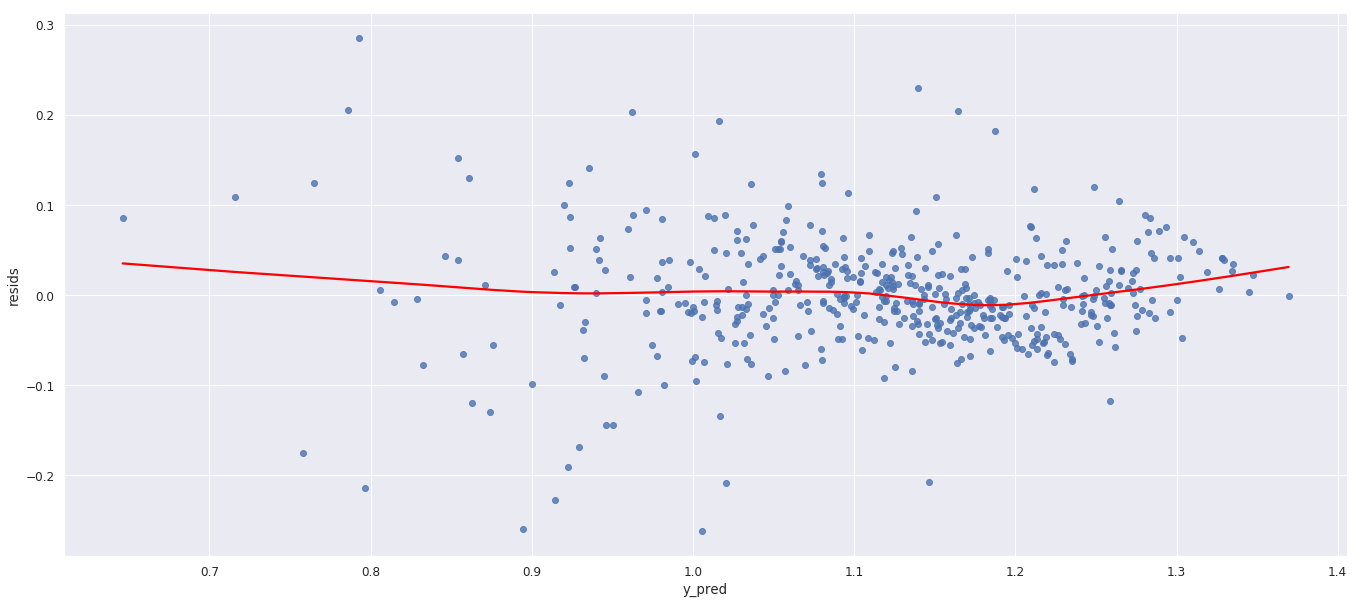

In [28]:
y_pred = model.predict(Xc)
resids = model.resid

sns.regplot(x = y_pred,y = resids,lowess=True,line_kws={'color':'red'})
plt.xlabel('y_pred')
plt.ylabel('resids')

In [29]:
#Goldfeld Test for Checking Homoscedasticity
import statsmodels.stats.api as sm
from statsmodels.compat import lzip

name = ['F-statstics','p-value']
test = sm.het_goldfeldquandt(model.resid,model.model.exog)
print(lzip(name,test))

[('F-statstics', 4.145902134994872), ('p-value', 1.3468497456285913e-26)]


Ho: Variance of residuals is constant across the range of data.
H1: Variance of residuals is not constant across the range of data.
    
Since p-value is less than 0.05 we will reject the Ho to conclude that residuals are heteroscedastic.

## 3.Test of Autocorrelation

In [30]:
import statsmodels.api as sm
y = df['Price']
X = df.drop('Price',axis = 1)
Xc = sm.add_constant(X)

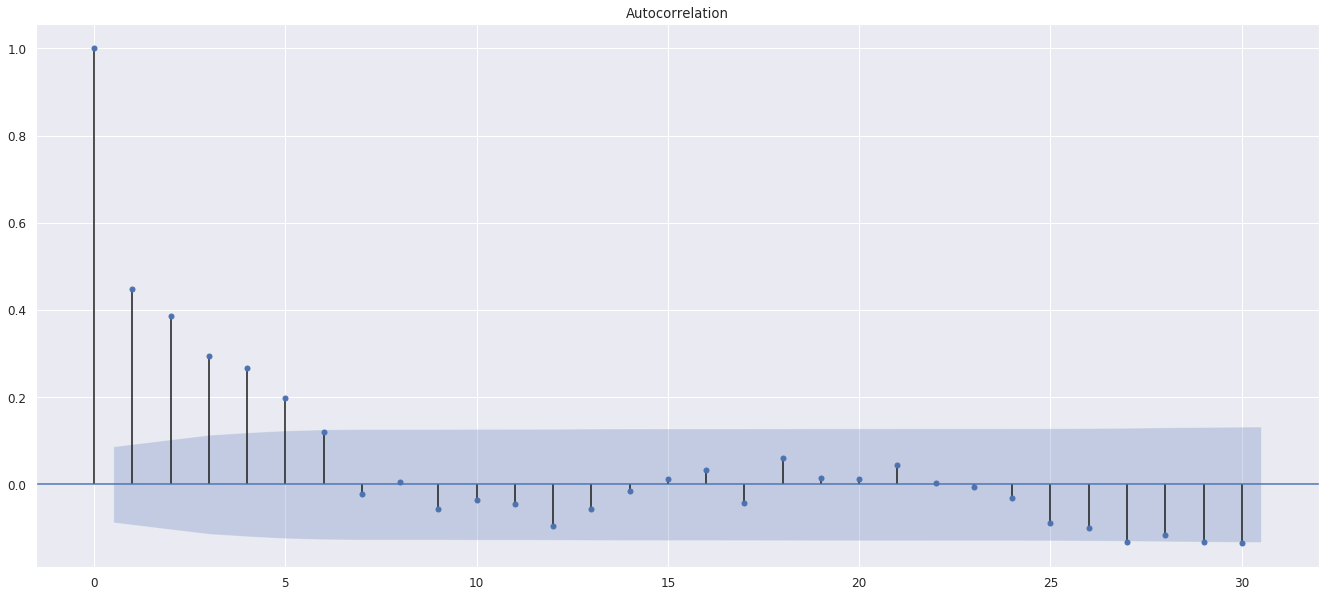

In [31]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid,lags = 30)
acf.show()

# 4. Test of Linearity

In [32]:
import statsmodels.api as sm
y = df['Price']
X = df.drop('Price',axis = 1)
Xc = sm.add_constant(X)

Text(0, 0.5, 'residuals')

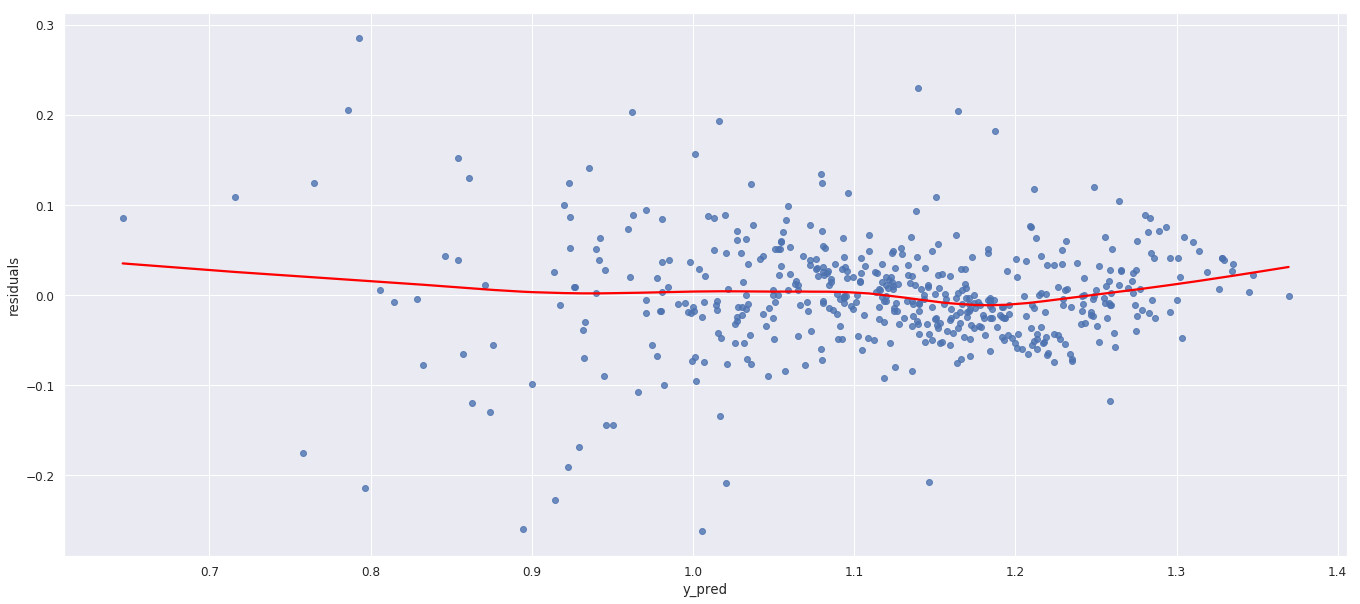

In [33]:
sns.regplot(x = y_pred, y = resids,lowess=True,line_kws={'color':'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')

In [34]:
#Rainbow Test for Linearity of Residuals
sm.stats.diagnostic.linear_rainbow(res = model,frac = 0.5)

(2.1473787353208897, 1.727008997271539e-09)

Ho: residuals exhibit linearity

H1: residuals exhibit non-linearity

Based on the test we can conclude that residuals exhibhit non-linearity.

# Building Linear Regression Model

### Splitting data into training and testing sets

In [35]:
#Applying the dependent and independent variable
y = df['Price']
X = df.drop('Price',axis = 1)

In [36]:
#Splitting the dataframe in 70:30(train and test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [37]:
#printing the shape of train and test
print(X_train.shape,X_test.shape)

(354, 13) (152, 13)


### Performing Linear Regression and calculating error terms

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print('r-square for train: ', r2_score(y_train,y_train_pred))
print('RMSE for train: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('\n')
print('r-square for test: ', r2_score(y_test,y_test_pred))
print('RMSE for test: ', np.sqrt(mean_squared_error(y_test,y_test_pred)))

r-square for train:  0.7979113662509134
RMSE for train:  0.17942687799752347


r-square for test:  0.7503690648021765
RMSE for test:  0.17768987842206063


#### This model has an accuracy of 75%

# Feature Elimination

# Recursive Feature Elimination(RFE)

In [39]:
#Splitting into X and y
y = df['Price']
X = df.drop('Price',axis = 1)

In [40]:
#importng LR,RFE,R2-SQUARE,MEAN SQUARE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

In [41]:
#Fitting rfe to lr 
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=13)
rfe.fit(X,y)

#WE ASKED ALGORITHM TO TELL US WHICH FEATURE IS WORSE BY PUTTING 'n_features_to_select = 13

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=13, step=1, verbose=0)

In [42]:
#rfe support function
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [43]:
pd.DataFrame(rfe.ranking_,index = X.columns,columns=['SELECT'])

,SELECT
CRIM,1
ZN,1
INDUS,1
CHAS,1
NOX,1
RM,1
AGE,1
DIS,1
RAD,1
TAX,1


This will give 13 best features with rank 1 and rest features with subsequent ranks.

In [44]:
#importing train test split method and splitting data into 70:30 ratio
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [45]:
no_of_cols = X_train.shape[1]
r2score = []
rmse = []

lr = LinearRegression()  #estimator

for i in range(no_of_cols):
    rfe = RFE(lr,n_features_to_select=i+1)
    rfe.fit(X_train,y_train)
    y_test_pred = rfe.predict(X_test)
    
    #r2score
    r2 = r2_score(y_test,y_test_pred)
    r2score.append(r2)
    
    #rmse
    rms = np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse.append(rms)

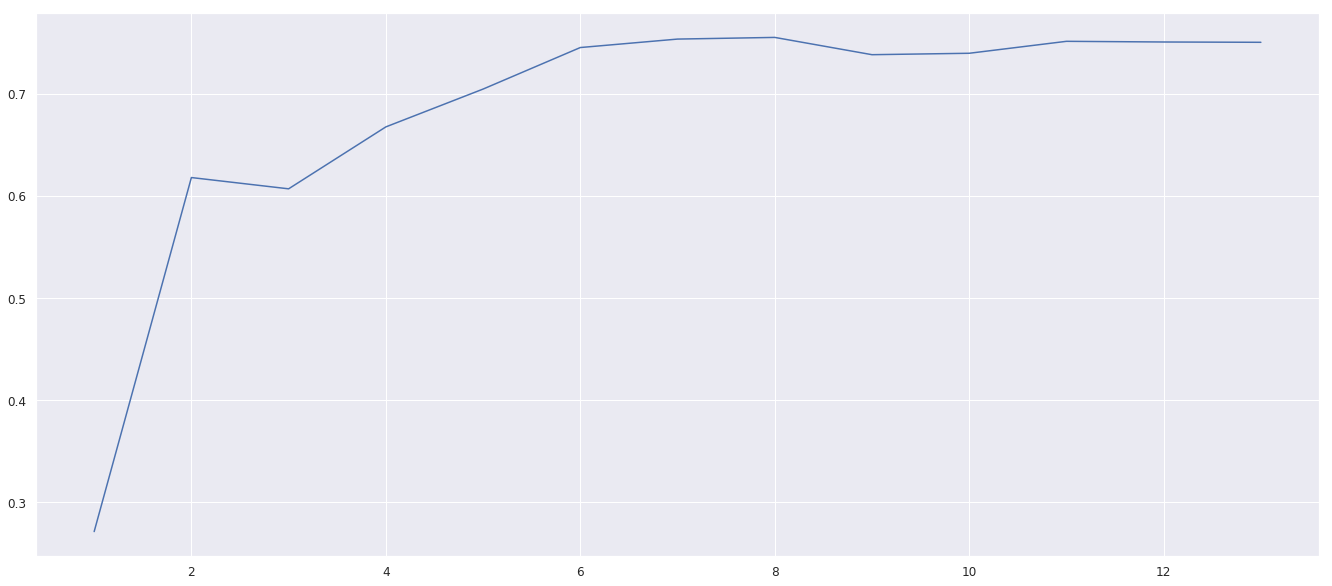

In [46]:
plt.plot(range(1,14),r2score)

In [47]:
r2score

[0.2714500545828753,
 0.6179852811376315,
 0.6069577602980252,
 0.667565798672679,
 0.704586073831611,
 0.7452434356204715,
 0.7535202600273913,
 0.7551580367911874,
 0.7382424645340806,
 0.7396329208954489,
 0.7513285739135676,
 0.7506683507467231,
 0.7503690648021765]

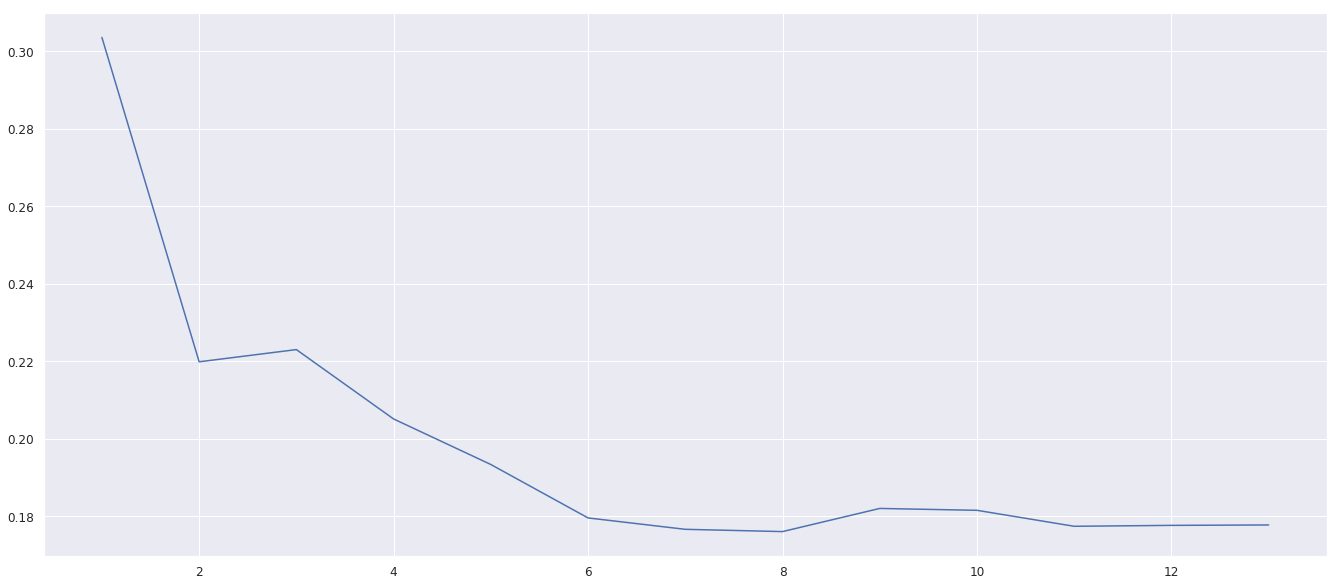

In [48]:
plt.plot(range(1,14),rmse)

In [49]:
rmse

[0.3035590278575291,
 0.21981308250674442,
 0.222963155071393,
 0.2050530991151464,
 0.19329871664316864,
 0.17950484705174194,
 0.17656478987329813,
 0.17597720470539802,
 0.1819546190037702,
 0.18147070392488865,
 0.1773480553898774,
 0.17758332906309923,
 0.17768987842206063]

# Hyperparamtere Tuning to find the optimal number of features to keep

In [50]:
#Importing KFold and GridSearchCV
from sklearn.model_selection import KFold,GridSearchCV

params = {'n_features_to_select': list(range(1,14))}
lr = LinearRegression()
rfe = RFE(lr)

kf = KFold(n_splits=3,random_state=True)

gsearch = GridSearchCV(rfe,param_grid=params,scoring = 'r2',cv = kf,return_train_score=True)
gsearch.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=KFold(n_splits=3, random_state=True, shuffle=False),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [51]:
#Finding the best parameters
gsearch.best_params_

{'n_features_to_select': 7}

We found that hyperparameter tuning its telling us to  keep 5 features out of 13 features.

In [52]:
#Displaying the results
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.012635,0.000287,0.001445,0.000032,1,{'n_features_to_select': 1},-0.366214,-0.879007,-0.517082,-0.587434,0.215176,13,0.339693,0.204328,0.775576,0.439865,0.243731
1,0.011960,0.000632,0.001541,0.000096,2,{'n_features_to_select': 2},0.246548,-1.061566,-0.361881,-0.392300,0.534468,12,0.537079,0.311361,0.785699,0.544713,0.193723
2,0.010838,0.000127,0.001454,0.000038,3,{'n_features_to_select': 3},0.314116,0.190750,-0.333276,0.057197,0.280662,11,0.554628,0.641185,0.788630,0.661481,0.096603
3,0.037629,0.038580,0.001531,0.000018,4,{'n_features_to_select': 4},0.139896,0.423343,-0.096882,0.155453,0.212666,10,0.570597,0.663029,0.825626,0.686418,0.105420
4,0.009319,0.000321,0.001502,0.000075,5,{'n_features_to_select': 5},0.388890,0.524046,-0.061085,0.283950,0.250139,7,0.741553,0.677251,0.837704,0.752169,0.065933
5,0.008898,0.000303,0.001467,0.000010,6,{'n_features_to_select': 6},0.623743,0.547217,0.109860,0.426940,0.226376,4,0.760324,0.677447,0.838445,0.758739,0.065737
6,0.007909,0.000048,0.001535,0.000089,7,{'n_features_to_select': 7},0.604333,0.553586,0.346559,0.501493,0.111496,1,0.762405,0.710145,0.862909,0.778486,0.063394
7,0.006956,0.000102,0.001520,0.000040,8,{'n_features_to_select': 8},0.438510,0.563064,0.346808,0.449461,0.088625,2,0.767211,0.717550,0.862909,0.782556,0.060327
8,0.006299,0.000247,0.001455,0.000031,9,{'n_features_to_select': 9},0.443878,0.541185,0.296567,0.427210,0.100558,3,0.796283,0.718056,0.872775,0.795705,0.063165
9,0.005102,0.000123,0.001466,0.000090,10,{'n_features_to_select': 10},0.452574,0.517683,0.304553,0.424937,0.089178,5,0.796705,0.720433,0.872933,0.796690,0.062258


# Forward selection to decide the best number of features to keep in the model(Step Forward Selection)

In [53]:
#importing SFS and fitting it
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(lr,k_features=13,scoring='r2',cv = 3,verbose=2)
sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2020-04-02 08:53:20] Features: 1/13 -- score: 0.34485340894810007[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2020-04-02 08:53:20] Features: 2/13 -- score: 0.4938197938263273[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2020-04-02 08:53:20] Features: 3/13 -- score: 0.5143119689946145[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=13, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=2)

In [54]:
#Making dataframe for subset of sfs and transforming it
sf = pd.DataFrame(sfs1.subsets_).T
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)","[0.4816208997648318, 0.1187708033737015, 0.434...",0.344853,"(LSTAT,)"
2,"(10, 12)","[0.5746383591445046, 0.3806665763618581, 0.526...",0.49382,"(PTRATIO, LSTAT)"
3,"(10, 11, 12)","[0.6139592488451235, 0.3978410535521868, 0.531...",0.514312,"(PTRATIO, B, LSTAT)"
4,"(4, 10, 11, 12)","[0.6127567069329376, 0.40816785554585644, 0.53...",0.518931,"(NOX, PTRATIO, B, LSTAT)"
5,"(4, 7, 10, 11, 12)","[0.6056887193039648, 0.5171716747366621, 0.567...",0.563516,"(NOX, DIS, PTRATIO, B, LSTAT)"
6,"(3, 4, 7, 10, 11, 12)","[0.6015137611970596, 0.5281372300592966, 0.579...",0.569791,"(CHAS, NOX, DIS, PTRATIO, B, LSTAT)"
7,"(0, 3, 4, 7, 10, 11, 12)","[0.61932135326105, 0.5127964109987573, 0.59200...",0.574709,"(CRIM, CHAS, NOX, DIS, PTRATIO, B, LSTAT)"
8,"(0, 1, 3, 4, 7, 10, 11, 12)","[0.6231670308636867, 0.5392565198975177, 0.575...",0.579448,"(CRIM, ZN, CHAS, NOX, DIS, PTRATIO, B, LSTAT)"
9,"(0, 1, 3, 4, 6, 7, 10, 11, 12)","[0.6259798367241654, 0.5330546892360262, 0.578...",0.579273,"(CRIM, ZN, CHAS, NOX, AGE, DIS, PTRATIO, B, LS..."
10,"(0, 1, 2, 3, 4, 6, 7, 10, 11, 12)","[0.6176506965365058, 0.4983548492791706, 0.440...",0.518918,"(CRIM, ZN, INDUS, CHAS, NOX, AGE, DIS, PTRATIO..."


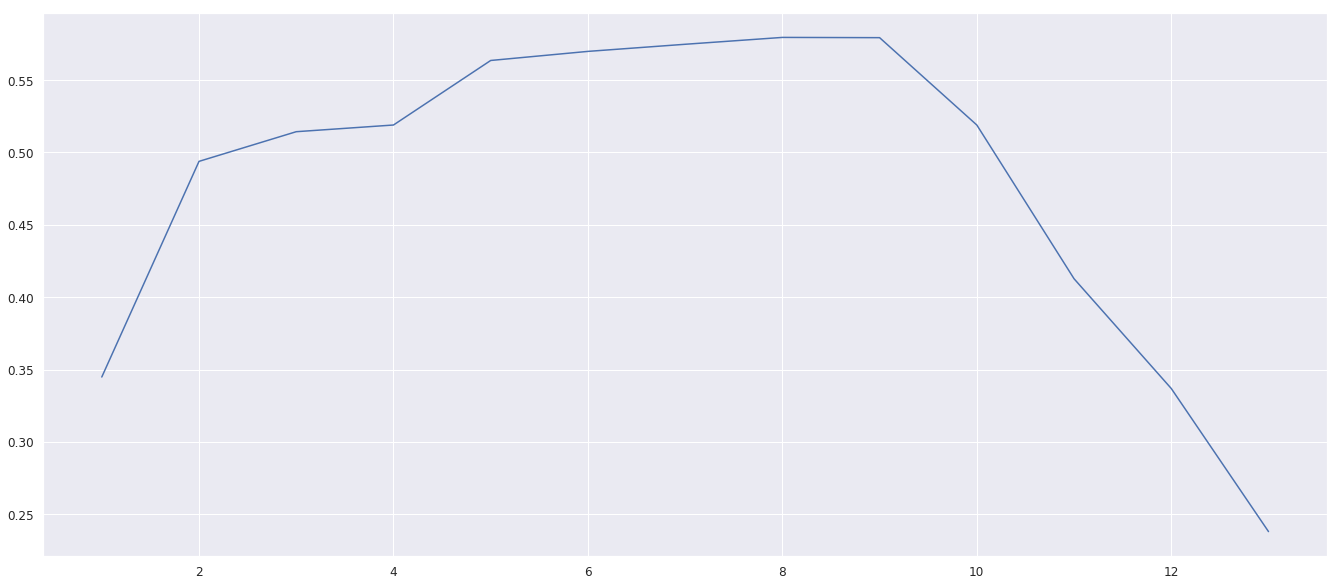

In [55]:
plt.plot(sf['avg_score'])

In [56]:
cols = list(sfs1.k_feature_names_)
cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

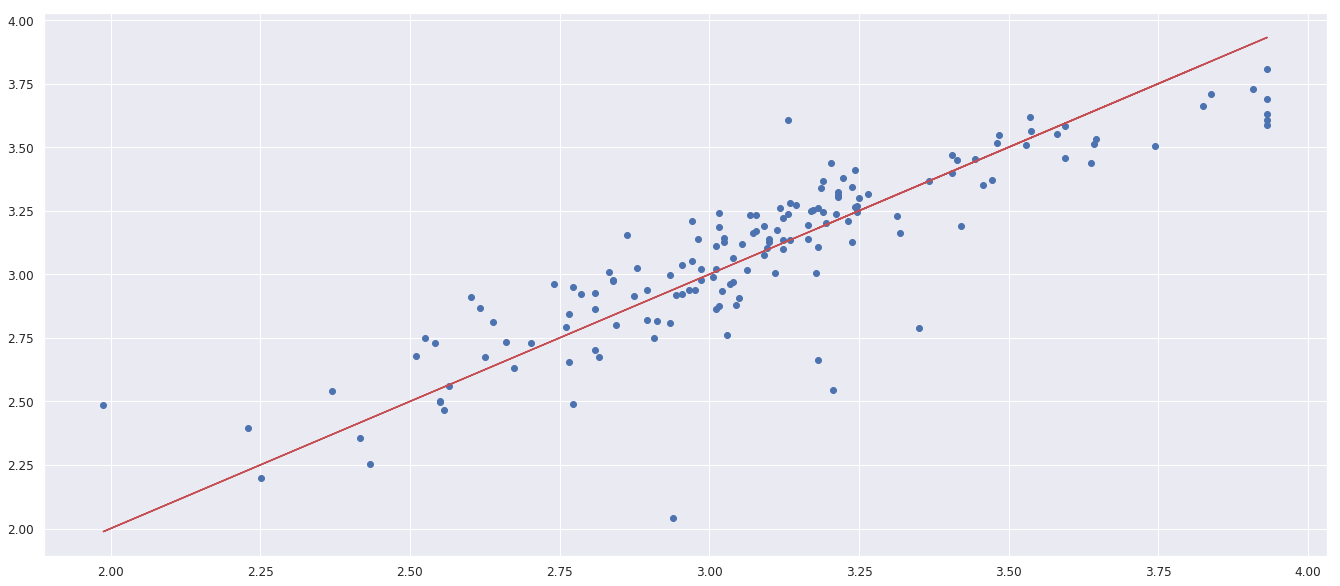

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.3, random_state=3)

lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test,'r')

# Regularization Techniques

# Lasso

In [58]:
#importing lasso library
from sklearn.linear_model import Lasso,LassoCV

In [59]:
#Applying Lasso function and fitting it
alphas = np.linspace(0.0001,1,100)
lasso_cv = LassoCV(alphas = alphas,cv = 3,random_state=3)
lasso_cv.fit(X,y)
lasso_cv

LassoCV(alphas=array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-01,
       1.819e-01, 1.920e-01, 2.021e-01, 2.122e-01, 2.223e-01, 2.324e-01,
       2.425e-01, 2.526e-01, 2.627e-01, 2.728e-01, 2.829e-01, 2.930e-01,
       3.031e-01, 3.132e-01, 3.233e-0...
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=3, selection='cyclic', tol=0.0001,
        verbose=False)

In [60]:
#the best alpha
lasso_cv.alpha_

0.0405

In [61]:
#Finding the R-square for train and test using Lasso
lasso = Lasso(alpha=lasso_cv.alpha_,random_state=3)

lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('r-square of Train: ',r2_score(y_train,y_train_pred))
print('r-square of Test: ',r2_score(y_test,y_test_pred))

r-square of Train:  0.7613288413225049
r-square of Test:  0.6850574675686856


In [62]:
#Coeffiecient of Lasso
lasso.coef_

array([-0.00836769,  0.00116451, -0.        ,  0.        , -0.        ,
        0.        ,  0.00111197, -0.00804152,  0.01084302, -0.00053247,
       -0.02486123,  0.00049604, -0.03643307])

# Ridge

In [63]:
#importing ridge library
from sklearn.linear_model import Ridge,RidgeCV

In [64]:
#Applying Ridge function and fitting it
alphas = np.logspace(0,1,200)
ridge_cv = RidgeCV(alphas = alphas,scoring = 'r2',cv = 3)
ridge_cv.fit(X,y)
ridge_cv

RidgeCV(alphas=array([ 1.        ,  1.01163798,  1.0234114 ,  1.03532184,  1.0473709 ,
        1.05956018,  1.07189132,  1.08436597,  1.0969858 ,  1.1097525 ,
        1.12266777,  1.13573336,  1.148951  ,  1.16232247,  1.17584955,
        1.18953407,  1.20337784,  1.21738273,  1.2315506 ,  1.24588336,
        1.26038293,  1.27505124,  1.28989026,  1.30490198,  1.3200884 ,
        1.33545156,  1.35099352,  1.36671636,  1.38262217,  1.3987131 ,
        1.4149913 ,  1.431...
        7.57525026,  7.66341087,  7.75259749,  7.84282206,  7.93409667,
        8.02643352,  8.11984499,  8.21434358,  8.30994195,  8.40665289,
        8.50448934,  8.60346442,  8.70359136,  8.80488358,  8.90735464,
        9.01101825,  9.1158883 ,  9.22197882,  9.32930403,  9.43787828,
        9.54771611,  9.65883224,  9.77124154,  9.88495905, 10.        ]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [65]:
#the best alpha
ridge_cv.alpha_

10.0

In [66]:
#Finding the R-square for train and test using Lasso
ridge = Ridge(alpha =ridge_cv.alpha_,random_state=3 )   #this is ridge

ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)


print('r-sqaured of Train', r2_score(y_train, y_train_pred))     #this part we are putting the best alpha and then finding the predicted value
print('r-sqaured of Test', r2_score(y_test, y_test_pred))

r-sqaured of Train 0.7929227636677354
r-sqaured of Test 0.7274166468928508


In [67]:
#Coefficient for Ridge
ridge_cv.coef_

array([-0.00905499,  0.00126676, -0.00039795,  0.06954574, -0.09878757,
        0.09050744, -0.00034861, -0.03803835,  0.01222736, -0.00065369,
       -0.02989416,  0.00043026, -0.02835341])

# Elastic Net

In [68]:
#importing elastic net library
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [69]:
alphas = np.logspace(-4,0,100)
en_cv = ElasticNetCV(alphas = alphas, cv = 3, random_state=3)
en_cv.fit(X,y)
en_cv

ElasticNetCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.054802...
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
             copy_X=True, cv=3, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=3,
             selection='cyclic', tol=0.0001, verbose=0)

In [70]:
#best alpha for elasticnet
en_cv.alpha_

0.03511191734215135